In [2]:
import sys
import matplotlib.pyplot as plt
import json
import numpy as np
from matplotlib.lines import Line2D
import random

sys.path.append("..")

In [3]:
from src.constants import LANG_CODES, FGN_ALPH
from src.cipher_utils import create_encryption_dict, encode
from src.mcmc import cross_validation, eval_close_solutions_lw

In [4]:
lang = "SV"
with open("../data/" + lang.lower() + "_corpus.txt") as file:
    corpus = file.read()

In [5]:
print(lang + " corpus has " + str(len(corpus)) + " characters")

SV corpus has 2768501 characters


In [6]:
lang_perc_dicts ={}
lang_encryption_dicts = {}
for lang_code in LANG_CODES:

    with open("../data/" + lang_code +"_perc_dict.json") as file:
        perc_dict = json.load(file)
        lang_perc_dicts[lang_code] = perc_dict

    lang_encryption_dicts[lang_code] = create_encryption_dict(FGN_ALPH[lang_code])

In [7]:
messages = {"pl" : "W sercu lasu mieszkał kotek Epsilon, szary z białymi łatkami i oczami jak dwa księżyce. Podczas wędrówki odkrył ścieżkę wśród malin, która zaprowadziła go na polanę z fioletowymi kwiatami i błyszczącymi kamykami. Jeden z nich świecił jaśniej. Zabrał go, po drodze spotykając żuka, który opowiedział legendę o kamieniach spełniających życzenia. Epsilon zapragnął, by las pozostał nienaruszony. Wkrótce zauważył, że las stał się piękniejszy.".lower(),
            "hu" : "Az erdő szívében élt Epsilon cica, szürke bundával, fehér foltokkal és két holdként ragyogó szemmel. Egyik sétája során egy málnafákkal benőtt ösvényt fedezett fel, amely egy tisztásra vezetett, tele lila virágokkal és csillogó kavicsokkal. Az egyik kő fényesebben ragyogott a többinél. Epsilon elvitte magával, útközben találkozott egy bogárral, aki egy kívánságteljesítő kövekről szóló legendát mesélt. Epsilon azt kívánta, hogy az erdő érintetlen maradjon. Hamarosan észrevette, hogy az erdő még szebb lett.".lower(),
            "sv" : "I skogens hjärta bodde katten Epsilon, grå med vita fläckar och ögon som två månar. Under en vandring upptäckte han en stig bland hallonbuskarna som ledde till en glänta med lila blommor och glänsande små stenar. En av dem lyste starkare. Han tog den med sig och mötte på vägen en skalbagge som berättade en legend om stenar som uppfyller önskningar. Epsilon önskade att skogen skulle förbli orörd. Snart märkte han att den blivit ännu vackrare.".lower(),
            "de" : "Im Herzen des Waldes lebte das Kätzchen Epsilon, grau mit weißen Flecken und Augen wie zwei Monde. Auf einem seiner Streifzüge entdeckte er einen Pfad zwischen Himbeersträuchern, der ihn zu einer Lichtung mit violetten Blumen und glänzenden Kieselsteinen führte. Einer davon leuchtete heller als die anderen. Er nahm ihn mit und traf unterwegs einen Käfer, der ihm eine Legende über Wunschsteine erzählte. Epsilon wünschte sich, dass der Wald unberührt bleibt. Bald bemerkte er, dass der Wald noch schöner geworden war.".lower(),
            "it" : "Nel cuore della foresta viveva il gattino Epsilon, grigio con macchie bianche e occhi che brillavano come due lune. Durante una delle sue passeggiate, scoprì un sentiero tra i lamponi che lo condusse a una radura con fiori viola e sassolini luccicanti. Uno di essi brillava più degli altri. Lo prese con sé e, lungo la strada, incontrò uno scarabeo che gli raccontò una leggenda su pietre che esaudiscono desideri. Epsilon desiderò che la foresta restasse intatta. Presto si accorse che era diventata ancora più bella.".lower()}

In [8]:
encoded_messages = {}
for lang, message in messages.items():
    encoded_messages[lang] = encode(message, lang_encryption_dicts[lang])

In [9]:
attempts = 100
max_iters = 25000
iters_list = list(range(5000, max_iters+1, 5000))
sensitivity = [x/ 100 for x in range(0, 26, 5)]

KeyboardInterrupt: 

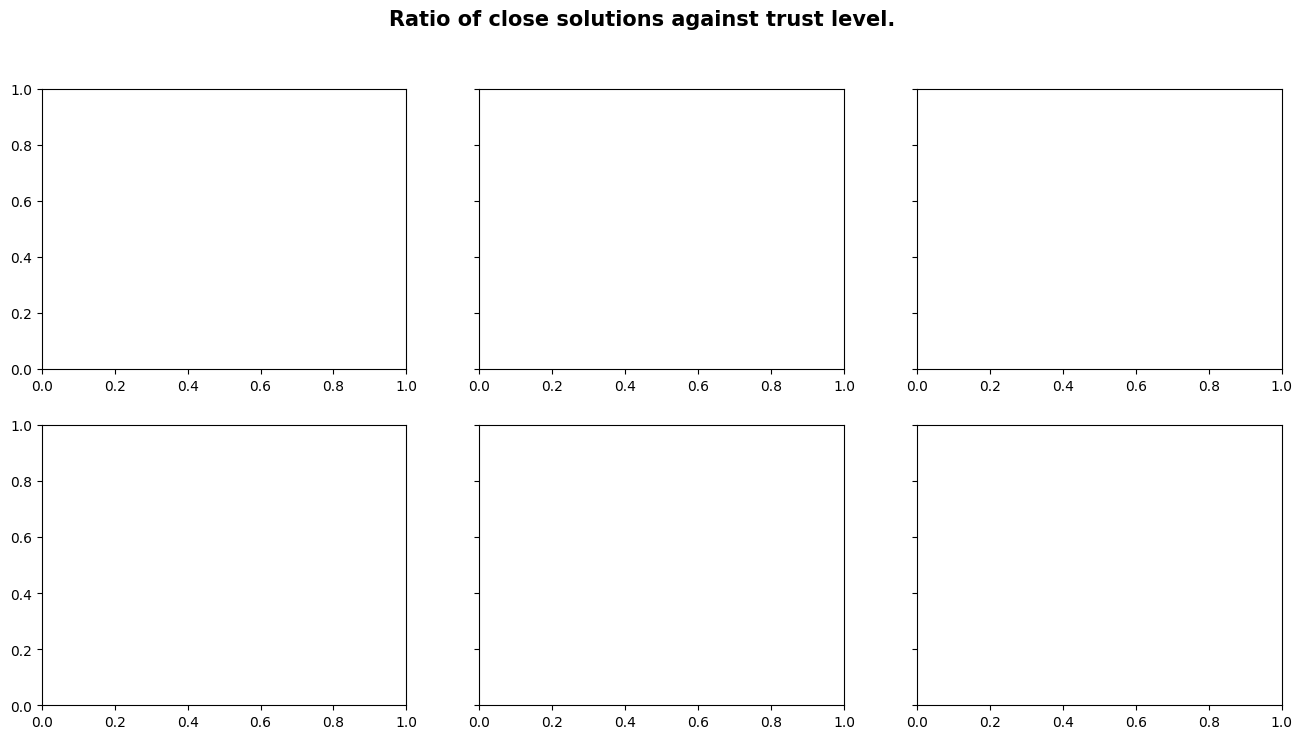

In [10]:
colors = ["#FF9719", "#1EC14E", "#FF3083", "#01FBFF", "#B632FF"]
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
fig.suptitle("Ratio of close solutions against trust level.", fontsize=15, fontweight="bold")
for r in range(2):
    for c in range(3):
        level = sensitivity[3*r + c]
        for i, lang in enumerate(LANG_CODES):
            perf_list = []
            for iters in iters_list:
                solutions, _ = cross_validation(attempts=attempts, encoded_text=encoded_messages[lang], perc_dict=lang_perc_dicts[lang], iters=iters, alphabet=FGN_ALPH[lang])
                perf = eval_close_solutions_lw(messages[lang], solutions, level)
                perf_list.append(perf)
            ax[r][c].plot(iters_list, perf_list, label = lang_code, color = colors[i], alpha = 0.7, ls="-")
            ax[r][c].set_xlabel(str(level), fontweight = "bold")
        legend_handles = [Line2D([0], [0], marker="o", color="w", markerfacecolor=color, markersize=10, label=lang_code) for color, lang_code in zip(colors, LANG_CODES)]
        fig.legend(handles=legend_handles, title="Language", loc=6)     

fig.text(0.5, 0.01, 'Trust level', ha='center', va='center', fontsize=12, fontweight="bold") 
plt.show()

In [11]:
en_message = "In the heart of the forest lived a kitten named Epsilon, gray with white patches and eyes that shone like two moons. During one of his walks, he discovered a path among the raspberries that led him to a clearing filled with purple flowers and sparkling pebbles. One of them shone brighter than the others. He took it with him, and on the way, he met a beetle who told him a legend about stones that grant wishes. Epsilon wished for the forest to remain untouched. Soon, he noticed it had become even more beautiful.".lower()

In [12]:
d = create_encryption_dict()
enc = encode(en_message, d)
random_code = random.choice(LANG_CODES)
decoded_messages = cross_validation(100, enc, lang_perc_dicts[random_code], 25000, alphabet=FGN_ALPH[random_code])[0]
sensitivity = [x/ 100 for x in range(0, 100, 5)]
l = {"pl": "polish", "de": "german", "hu": "hungarian", "it": "italian", "sv": "swedish"}
print(f"Trying to decode english message with {l[random_code]} probabilities. \n")
for level in sensitivity:
    perc = eval_close_solutions_lw(en_message, decoded_messages, level)
    print(f"For trust level: {level:.2f} close solution ratio for final decoded message was: {perc:.2f}.")

Trying to decode english message with italian probabilities. 

For trust level: 0.00 close solution ratio for final decoded message was: 0.00.
For trust level: 0.05 close solution ratio for final decoded message was: 0.00.
For trust level: 0.10 close solution ratio for final decoded message was: 0.00.
For trust level: 0.15 close solution ratio for final decoded message was: 0.00.
For trust level: 0.20 close solution ratio for final decoded message was: 0.00.
For trust level: 0.25 close solution ratio for final decoded message was: 0.00.
For trust level: 0.30 close solution ratio for final decoded message was: 0.00.
For trust level: 0.35 close solution ratio for final decoded message was: 0.00.
For trust level: 0.40 close solution ratio for final decoded message was: 0.00.
For trust level: 0.45 close solution ratio for final decoded message was: 0.00.
For trust level: 0.50 close solution ratio for final decoded message was: 0.01.
For trust level: 0.55 close solution ratio for final deco